# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# To get the number of rides(ride_id) grouped by type of city, we need to merge the two dataframses.
# merge different data sets import the os module with the dependencies

import os

# File to Load (Remember to change these)- changed
city_data_path = 'Resources/city_data.csv'
ride_data_path = 'Resources/ride_data.csv'

In [2]:
# Read the City Data
city_data_df = pd.read_csv(city_data_path)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# Read the Ride Data
ride_data_df = pd.read_csv(ride_data_path)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
# Before analysing the data it needs to be wrangled (cleaned, munged)
# Inspect and or clean up the City & Ride Data DataFrame 
# Get the columns and rows that are not null
# Check to confirm the correct data type is being used
# Get all the rows that contain null values by getting rows that are not null.df.count() or df.isnull().sum() method) 
# Findout number of data points for each city type.

In [5]:
# Get the columns and the rows that are not null. (All counts at 120 so no missing values, clean data set)
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Confirm the data type (Datatypes are ok)
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get all the rows that contain null values (no null values so ok)
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the columns and the rows that are not null.(All counts at 2375 so no missing values, clean data set)
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
# Confirm the data type (date is object type so best to clean it up before merging the data or analysing it)
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
# Get all the rows that contain null values (no null values so ok)
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
## convert datetime column to just date using normalize()
# method
ride_data_df['date']=pd.to_datetime(ride_data_df['date']).dt.normalize()


In [12]:
# Recheck the data type (date has been changed from object type to date type)
ride_data_df.dtypes

city               object
date       datetime64[ns]
fare              float64
ride_id             int64
dtype: object

### Merge the DataFrames

In [13]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06,34.58,3908451377344,46,Urban


In [14]:
# Confirm the data types  (date data type may need to be changed to datetime)
pyber_data_df.dtypes

city                    object
date            datetime64[ns]
fare                   float64
ride_id                  int64
driver_count             int64
type                    object
dtype: object

In [15]:
#  To get the total rides for each city type first group by type of city - Get the unique values of the different types of city so as to create define these variables(types of cities)
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

## Deliverable 1: Get a Summary DataFrame 

In [16]:
#  1. Get the total rides for each city type


In [17]:
# Total Rides Count for each city type
type_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [18]:
# 2. Get the total drivers for each city type

In [19]:
# Total number of drivers for each city type
type_total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
type_total_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [20]:
#  3. Get the total amount of fares for each city type

In [21]:
#  3. Get the total amount of fares for each city type
# Use the sum function to get the total number of fares for each city type

In [22]:
type_total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
type_total_fare.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [23]:
#  4. Get the average fare per ride for each city type. 

In [24]:
# Average fare per ride is total fare / no of rides - simplifies apply the mean function formula to get the same result

In [25]:
type_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
type_avg_fare.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [26]:
# 5. Get the average fare per driver for each city type. 

In [27]:
# 5. Get the average fare per driver for each city type i.e.sun of fare per city type / numnber of drivers per city type 

In [28]:
avg_fare_per_driver_per_city =  pyber_data_df.groupby(["type"]).sum()["fare"]/city_data_df.groupby(["type"]).sum()["driver_count"]
avg_fare_per_driver_per_city.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [29]:
#  6. Create a PyBer summary DataFrame. 

In [30]:
pyber_summary_df=pd.DataFrame(
    { "Total Rides": type_rides_count,
      "Total Drivers": type_total_drivers,
      "Total Fares": type_total_fare,
      "Average Fare per Ride": type_avg_fare,
      "Average Fare per Driver": avg_fare_per_driver_per_city})

In [31]:
# Print Data Frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [32]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [33]:
#  8. Format the columns.

In [34]:
# Add , to total rides and total drivers and $ to Total fares, Average fare/ride and average fare/driver
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

# Print formatting
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


# Deliverable 2: Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [35]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06,34.58,3908451377344,46,Urban


In [36]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

In [37]:
weekly_fare_df = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
weekly_fare_df

date        type    
2019-01-01  Rural        43.69
            Suburban    128.52
            Urban       127.78
2019-01-02  Rural        52.12
            Suburban    274.92
                         ...  
2019-05-06  Urban       181.20
2019-05-07  Rural        44.94
            Suburban    274.09
            Urban       258.01
2019-05-08  Urban       170.82
Name: fare, Length: 334, dtype: float64

In [38]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
weekly_fare_df = weekly_fare_df.reset_index()
weekly_fare_df

,date,type,fare
0,2019-01-01,Rural,43.69
1,2019-01-01,Suburban,128.52
2,2019-01-01,Urban,127.78
3,2019-01-02,Rural,52.12
4,2019-01-02,Suburban,274.92
...,...,...,...
329,2019-05-06,Urban,181.20
330,2019-05-07,Rural,44.94
331,2019-05-07,Suburban,274.09
332,2019-05-07,Urban,258.01


In [39]:
# Check the data types
weekly_fare_df.dtypes

date    datetime64[ns]
type            object
fare           float64
dtype: object

In [40]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

In [41]:
weekly_fare_pivot = weekly_fare_df.pivot(index="date", columns="type", values="fare")
weekly_fare_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89


In [42]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
weekly_fare_between_2019_01_01_and_2019_04_29 = weekly_fare_pivot.loc['2019-01-01':'2019-04-29']
weekly_fare_between_2019_01_01_and_2019_04_29

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30


In [43]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
weekly_fare_between_2019_01_01_and_2019_04_29.index = pd.to_datetime(weekly_fare_between_2019_01_01_and_2019_04_29.index)
weekly_fare_between_2019_01_01_and_2019_04_29.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-04-20', '2019-04-21', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-27',
               '2019-04-28', '2019-04-29'],
              dtype='datetime64[ns]', name='date', length=119, freq=None)

In [44]:
# 7. Check that the datatype for the index is datetime using df.info()
weekly_fare_between_2019_01_01_and_2019_04_29.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [45]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
# resample by week to get sum of fares for each week i.e. find the weekly fare for the period '2019-01-01':'2019-04-29'.
weekly_fare_between_2019_01_01_and_2019_04_29 = weekly_fare_between_2019_01_01_and_2019_04_29.resample("W").sum()
weekly_fare_between_2019_01_01_and_2019_04_29.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [46]:
# Check or priny the opening dates of the data, 1st week in Jan 2019
weekly_fare_between_2019_01_01_and_2019_04_29.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [47]:
# Check or print the closing dates and of the data ie. last Arp 29, 2019 is included in last week of May 5, 2019
weekly_fare_between_2019_01_01_and_2019_04_29.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29
2019-05-05,67.60,167.92,342.63


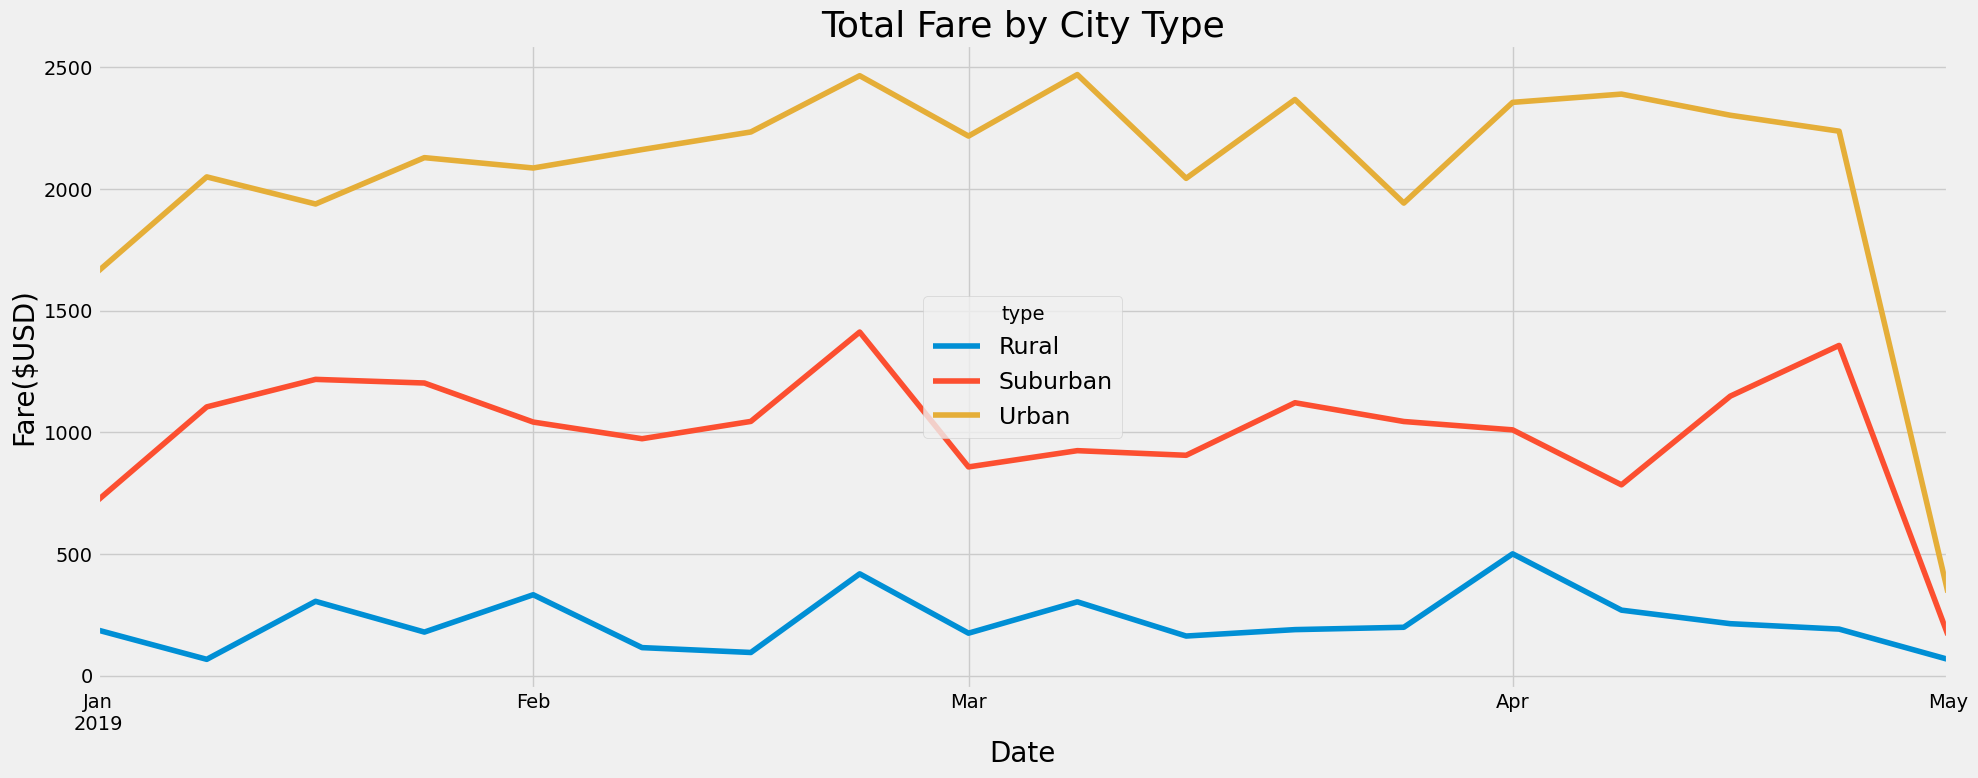

In [48]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Plotting sum_of_fare_by_weeks per city type uisng the Object-Oriented approach
ax = weekly_fare_between_2019_01_01_and_2019_04_29.plot(figsize=(20,8))

# Set axis 
ax.set_title("Total Fare by City Type", fontsize = "26")
ax.set_xlabel("Date", fontsize = "20")
ax.set_ylabel("Fare($USD)", fontsize = "20")
ax.grid(True)
ax.legend(["Rural","Suburban", "Urban", ], title="type", loc="center", fontsize="17", mode="Expanded")
plt.tight_layout()
plt.savefig("analysis/PyBer_fare_summary_20190101_20190429.png")
plt.show()